In [6]:
pip install xgboost

In [37]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

In [60]:
df=pd.read_csv("tourism_sql.csv")

In [39]:
df.columns

Index(['UserId', 'ContinentId', 'Continent', 'RegionId', 'Region', 'CountryId',
       'Country', 'CityId', 'CityName', 'TransactionId', 'VisitYear',
       'VisitMonth', 'VisitModeId', 'VisitMode', 'AttractionId', 'Attraction',
       'AttractionCityId', 'AttractionAddress', 'AttractionTypeId',
       'AttractionType', 'Rating'],
      dtype='object')

In [40]:
df['CityName'].nunique()

5543

In [41]:
df.shape

(52890, 21)

In [42]:
df.columns

Index(['UserId', 'ContinentId', 'Continent', 'RegionId', 'Region', 'CountryId',
       'Country', 'CityId', 'CityName', 'TransactionId', 'VisitYear',
       'VisitMonth', 'VisitModeId', 'VisitMode', 'AttractionId', 'Attraction',
       'AttractionCityId', 'AttractionAddress', 'AttractionTypeId',
       'AttractionType', 'Rating'],
      dtype='object')

In [43]:
df.duplicated().sum()

0

In [61]:
columns_drop=['Continent','Region','Country','CityName','VisitMode','Attraction','AttractionAddress','AttractionType','VisitModeId','VisitYear','UserId','ContinentId', 'RegionId', 'AttractionCityId',]
df_l=df.drop(columns=columns_drop)

In [45]:
df_l.head()

,CountryId,CityId,TransactionId,VisitMonth,AttractionId,AttractionTypeId,Rating
0,22,154,69140,9,748,72,5
1,22,167,11243,7,640,63,4
2,14,52,67843,7,748,72,5
3,22,106,9492,4,640,63,4
4,22,106,25475,4,841,92,5


In [46]:
df_copy=df.copy()
df_n = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
df_c = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']
print('We have {} df_n : {}'.format(len(df_n), df_n))
print('\nWe have {} df_c: {}'.format(len(df_c), df_c))

We have 13 df_n : ['UserId', 'ContinentId', 'RegionId', 'CountryId', 'CityId', 'TransactionId', 'VisitYear', 'VisitMonth', 'VisitModeId', 'AttractionId', 'AttractionCityId', 'AttractionTypeId', 'Rating']

We have 8 df_c: ['Continent', 'Region', 'Country', 'CityName', 'VisitMode', 'Attraction', 'AttractionAddress', 'AttractionType']


In [62]:
for col in df_c:
    print(df[col].value_counts(normalize=True)*100)
    print('---------------------------')

Continent
Asia                   29.625638
Australia & Oceania    28.080923
Europe                 25.078465
America                15.479297
Africa                  1.735678
Name: proportion, dtype: float64
---------------------------
Region
Australia           25.188126
South East Asia     19.648327
Western Europe      16.135375
Northern America    14.836453
South Asia           5.433919
Central Europe       4.354320
Oceania              2.892796
Middle East          2.393647
East Asia            2.119493
Southern Europe      1.871809
Northern Europe      1.610891
Southern Africa      1.217621
Eastern Europe       1.106069
South America        0.453772
North Africa         0.344110
East Africa          0.124787
Caribbean            0.102099
Central America      0.086973
West Africa          0.035924
Central Asia         0.030251
Central Africa       0.013235
Name: proportion, dtype: float64
---------------------------
Country
Australia         25.188126
United Kingdom    12.709397
Un

In [48]:
df.head()

,UserId,ContinentId,Continent,RegionId,Region,CountryId,Country,CityId,CityName,TransactionId,...,VisitMonth,VisitModeId,VisitMode,AttractionId,Attraction,AttractionCityId,AttractionAddress,AttractionTypeId,AttractionType,Rating
0,23,1,Africa,4,Southern Africa,22,South Africa,154,Meyerton,69140,...,9,4,Friends,748,Tegalalang Rice Terrace,1,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",72,Points of Interest & Landmarks,5
1,34,1,Africa,4,Southern Africa,22,South Africa,167,Paarl,11243,...,7,3,Family,640,Sacred Monkey Forest Sanctuary,1,"Jl. Monkey Forest, Ubud 80571 Indonesia",63,Nature & Wildlife Areas,4
2,60,1,Africa,3,North Africa,14,Egypt,52,Cairo,67843,...,7,2,Couples,748,Tegalalang Rice Terrace,1,"Jalan Raya Ceking, Tegalalang 80517 Indonesia",72,Points of Interest & Landmarks,5
3,103,1,Africa,4,Southern Africa,22,South Africa,106,Cape Town,9492,...,4,2,Couples,640,Sacred Monkey Forest Sanctuary,1,"Jl. Monkey Forest, Ubud 80571 Indonesia",63,Nature & Wildlife Areas,4
4,103,1,Africa,4,Southern Africa,22,South Africa,106,Cape Town,25475,...,4,2,Couples,841,Waterbom Bali,1,"Jl. Kartika Plaza, Kuta 80361 Indonesia",92,Water Parks,5


In [49]:
df['Rating'].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [50]:
df_l.head()

,CountryId,CityId,TransactionId,VisitMonth,AttractionId,AttractionTypeId,Rating
0,22,154,69140,9,748,72,5
1,22,167,11243,7,640,63,4
2,14,52,67843,7,748,72,5
3,22,106,9492,4,640,63,4
4,22,106,25475,4,841,92,5


In [63]:
from sklearn.preprocessing import StandardScaler

# List features to scale (exclude categorical IDs)
features_to_scale = ['TransactionId', 'VisitMonth']

scaler = StandardScaler()
df_l[features_to_scale] = scaler.fit_transform(df_l[features_to_scale])



In [64]:
import pickle
from sklearn.preprocessing import StandardScaler

# Step 1: Fit the scaler
features_to_scale = ['TransactionId', 'VisitMonth']
scaler = StandardScaler()
df_l[features_to_scale] = scaler.fit_transform(df_l[features_to_scale])

# Step 2: Save the scaler to a .pkl file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [52]:
df_l

,CountryId,CityId,TransactionId,VisitMonth,AttractionId,AttractionTypeId,Rating
0,22,154,-0.019144,0.697881,748,72,5
1,22,167,-0.892394,0.108419,640,63,4
2,14,52,-0.038706,0.108419,748,72,5
3,22,106,-0.918804,-0.775773,640,63,4
4,22,106,-0.677735,-0.775773,841,92,5
...,...,...,...,...,...,...,...
52885,125,5954,-0.896662,0.697881,640,63,3
52886,162,7833,0.021670,0.697881,748,72,2
52887,131,6129,-0.786860,-0.186312,640,63,4
52888,131,6129,-0.450739,-0.186312,650,13,3


In [53]:
df.describe()

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,AttractionCityId,AttractionTypeId,Rating
count,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000,52890.000000
mean,45022.852259,3.592872,14.533258,106.315617,3398.298639,70409.235980,2016.352619,6.632142,2.945623,759.661202,1.277557,58.927359,4.157799
std,25072.926068,1.075496,4.172372,35.734537,2326.478598,66301.199092,1.733037,3.392958,1.000535,210.711686,0.680022,28.340334,0.970582
min,14.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2013.000000,1.000000,1.000000,369.000000,1.000000,2.000000,1.000000
25%,23470.000000,3.000000,13.000000,93.000000,1434.000000,19639.250000,2015.000000,4.000000,2.000000,640.000000,1.000000,34.000000,4.000000
50%,45539.000000,4.000000,15.000000,109.000000,3156.000000,42765.500000,2016.000000,7.000000,3.000000,737.000000,1.000000,63.000000,4.000000
75%,66663.250000,5.000000,17.000000,121.000000,4940.000000,105639.750000,2018.000000,9.000000,4.000000,841.000000,1.000000,76.000000,5.000000
max,88190.000000,5.000000,21.000000,164.000000,9142.000000,211241.000000,2022.000000,12.000000,5.000000,1297.000000,3.000000,93.000000,5.000000


C:\Users\Sathish\AppData\Local\Temp\ipykernel_6120\1388594213.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_n[i]],shade=True, color='r')
C:\Users\Sathish\AppData\Local\Temp\ipykernel_6120\1388594213.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_n[i]],shade=True, color='r')
C:\Users\Sathish\AppData\Local\Temp\ipykernel_6120\1388594213.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_copy[df_n[i]],shade=True, color='r')
C:\Users\Sathish\AppData\Local\Temp\ipykernel_6120\1388594213.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This wil

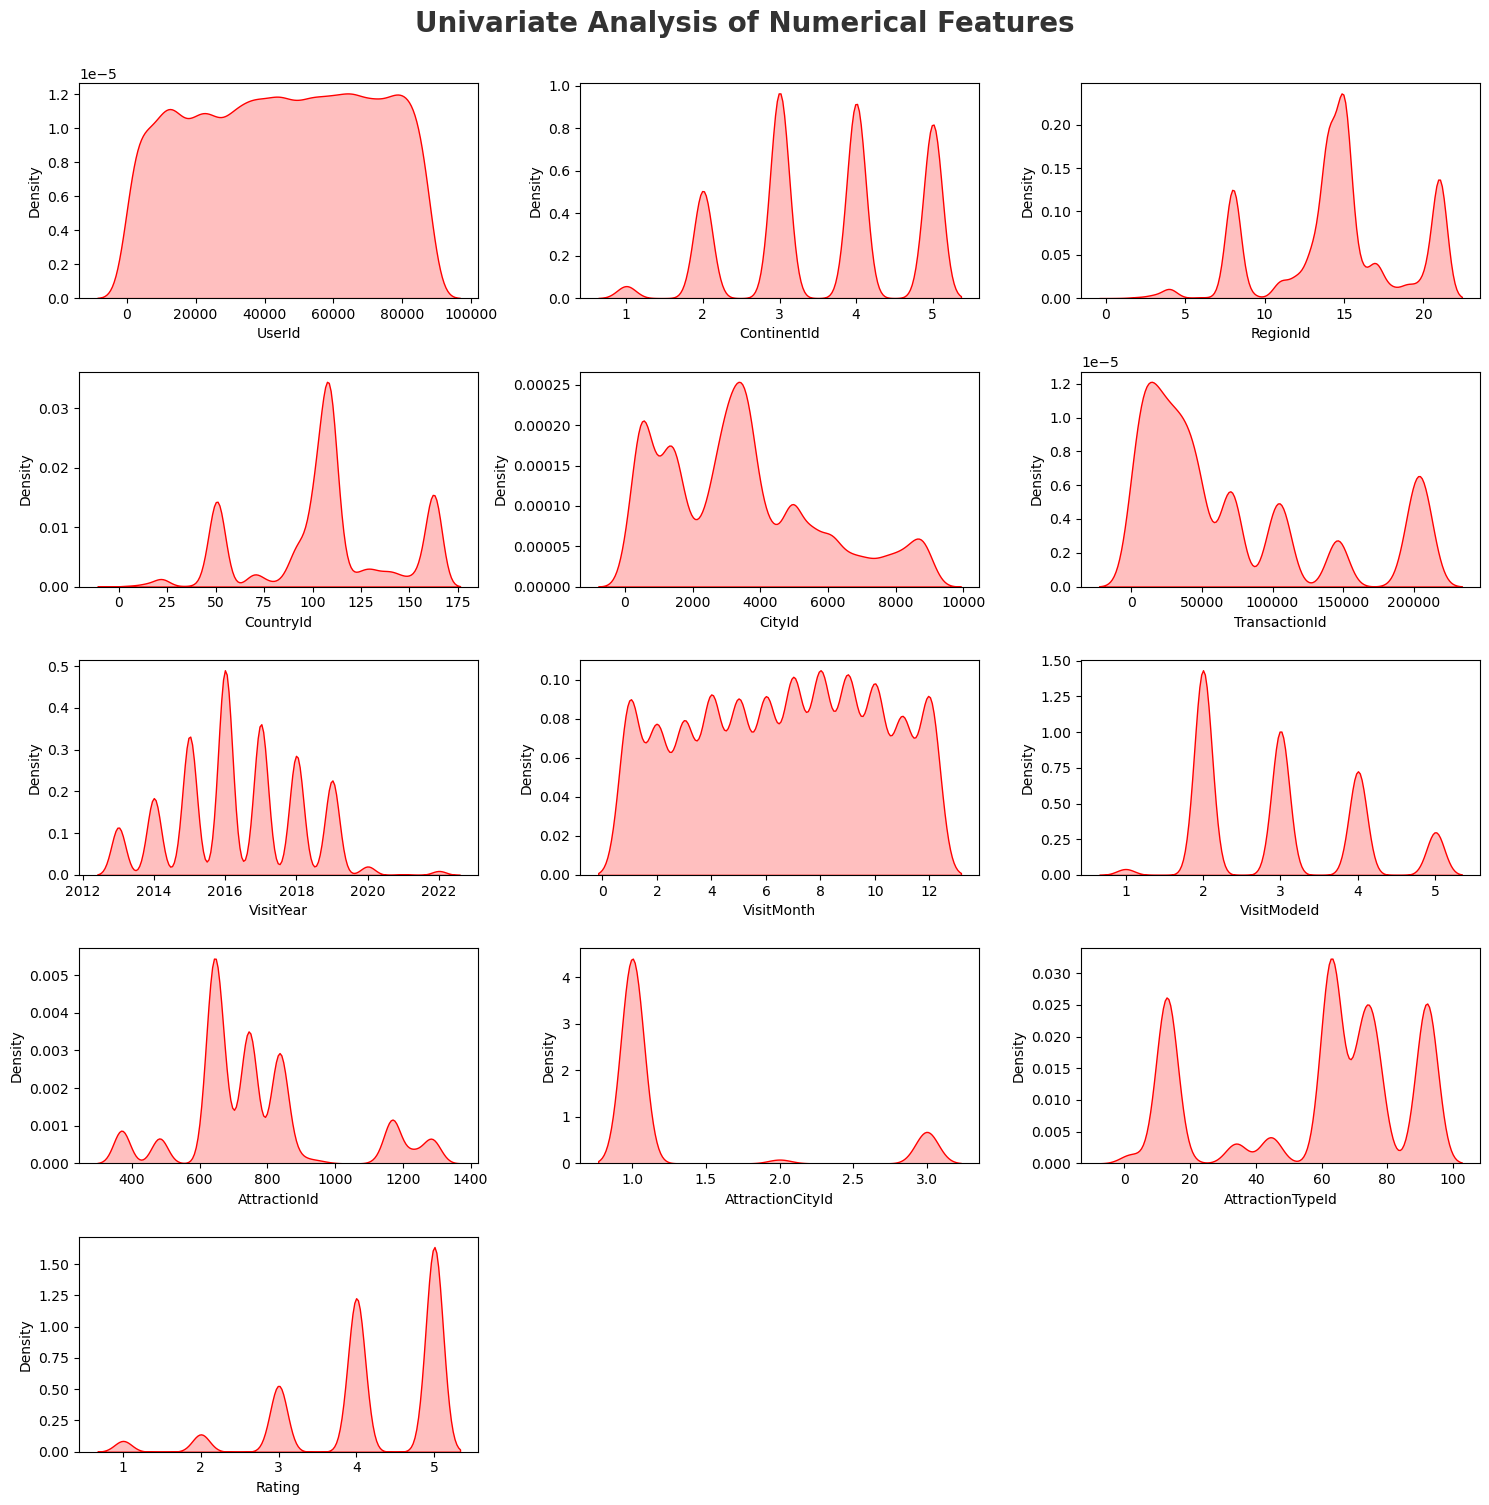

In [54]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(df_n)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df_copy[df_n[i]],shade=True, color='r')
    plt.xlabel(df_n[i])
    plt.tight_layout()

UserId:

Uniform distribution — almost all user IDs are equally represented.

ContinentId:

Five clear peaks → 5 continents with varying frequency (categorical encoded as numeric).

RegionId:

Skewed; a few regions dominate.

CountryId:

Some countries are more frequent, especially the ones with IDs around 125.

CityId:

Skewed right → few cities dominate in attraction data.

TransactionId:

Skewed left → lower IDs are more common; may reflect temporal order or usage frequency.

VisitYear:

Spikes around 2014 to 2020 → most visits happened in these years.

VisitMonth:

Fairly uniform → visits are spread across all months.

VisitModeId:

5 distinct values; some visit modes are more common than others.

AttractionId:

Multiple peaks; some attractions are far more visited.

AttractionCityId:

Mostly concentrated around 1 → maybe most attractions are in a specific city.

AttractionTypeId:

Multiple peaks → a few attraction types dominate.

Rating:

Clearly skewed toward 5 — users mostly give high ratings.

📌 Implications:
Skewed Distributions like in Rating, TransactionId, or CityId might need transformation (e.g., log scaling) if used in models.

Categorical Encoded as Numeric: Some columns (e.g., ContinentId, VisitModeId) look numeric but are actually categories → you should encode them properly (e.g., one-hot or label encoding).

Imbalanced Data: Some IDs (e.g., CountryId, AttractionTypeId) show imbalance, which could affect model performance.

Ratings: Strong positive bias — may lead to overestimation if used as a target variable.


<Axes: >

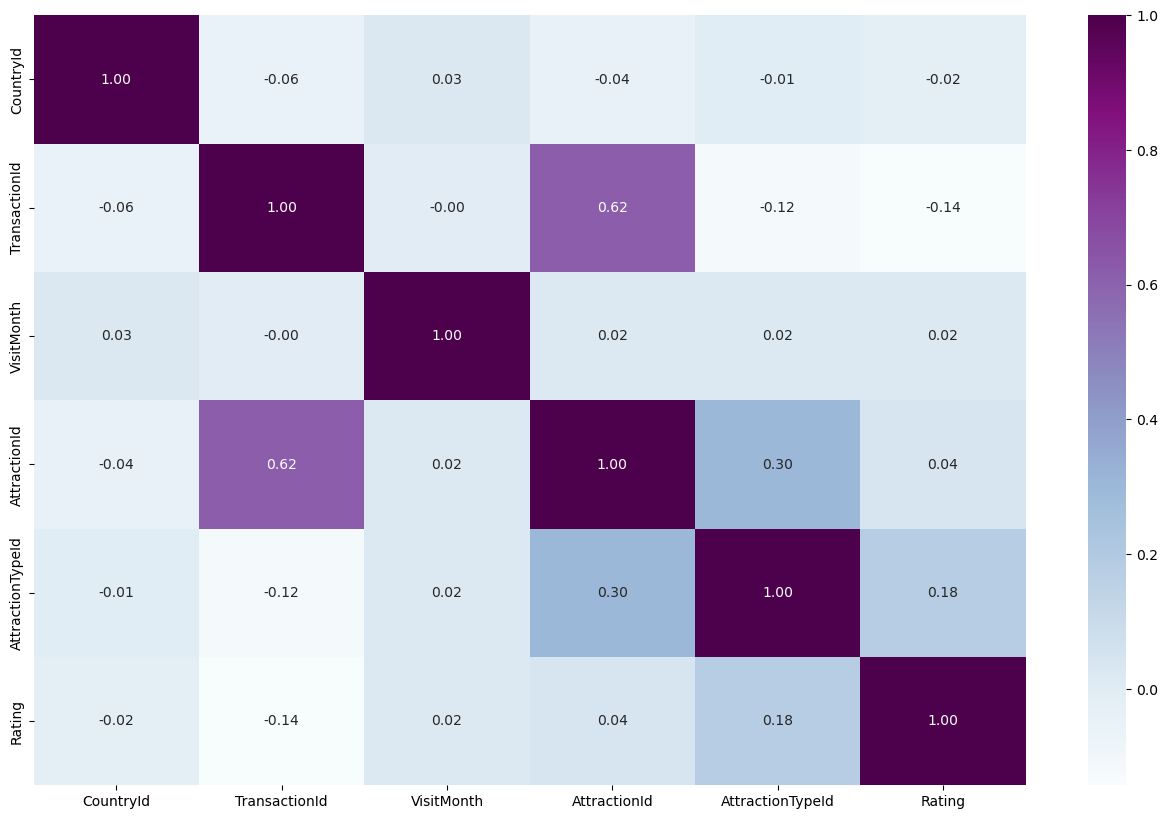

In [55]:
features = ['CountryId','TransactionId','VisitMonth',
            'AttractionId', 'AttractionTypeId', 'Rating']#, 'AttractionCityId'

corr_ = df_l[features].corr()  # Compute correlation matrix
plt.figure(figsize=(16, 10))  # Set large figure size
sns.heatmap(corr_, annot=True, fmt=".2f", cmap="BuPu")  # Plot heatmap


In [56]:
df_l=df_l.drop('TransactionId',axis=1)

In [57]:
x=df_l.drop('Rating',axis=1)
y=df_l['Rating']
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=50)
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")

x_train (42312, 5)
x_test (10578, 5)


In [58]:
import matplotlib.pyplot as plt
model=RandomForestRegressor()
model.fit(x_train,y_train)
feat_importance = pd.Series(model.feature_importances_, index=features)
feat_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()


ValueError: Length of values (5) does not match length of index (6)

In [65]:

models = [
    ('CatBoost', CatBoostRegressor(verbose=0)),
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('XGBoost', XGBRegressor(verbosity=0)),  
    ('SVM', SVR()),
    ('Ridge', Ridge(alpha=1.0)),
    ('Lasso', Lasso(alpha=0.1))
]

In [ ]:
for name,model in models:
    print(name)
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Mean squared Error", mean_squared_error(y_test,y_pred))
    print("Mean absolute Error", mean_absolute_error(y_test,y_pred))
    print("R2 score", r2_score(y_test,y_pred))
    print("\n")

CatBoost

Mean squared Error 0.8223549287804064
Mean absolute Error 0.7138042780148519
R2 score 0.11782215402163532


Random Forest

Mean squared Error 0.9619607893779945
Mean absolute Error 0.7504757779169172
R2 score -0.03193945508136409


Linear Regression

Mean squared Error 0.90209005846916
Mean absolute Error 0.7553694298246824
R2 score 0.03228662368566615


Decision Tree

Mean squared Error 1.2600531043845569
Mean absolute Error 0.7996007333847525
R2 score -0.3517167521484488


KNN

Mean squared Error 0.9756211003970504
Mean absolute Error 0.7630364908300246
R2 score -0.0465934971846409


XGBoost

Mean squared Error 0.8365108370780945
Mean absolute Error 0.7186318039894104
R2 score 0.10263657569885254


SVM



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Step 1: Select features and target
features = ['CountryId', 'TransactionId', 'VisitMonth',
            'AttractionId', 'AttractionCityId', 'AttractionTypeId']
target = 'Rating'

X = df_l[features]
y = df_l[target]

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the model
xgb = XGBRegressor(objective='reg:squarederror', verbosity=0)

# ✅ Step 4: Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 5: GridSearchCV setup
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Step 6: Fit the model
grid_search.fit(X_train, y_train)

# Step 7: Evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
R2 Score: 0.11243897676467896
RMSE: 0.9189247028623744


In [ ]:

from xgboost import XGBRegressor
xgb = XGBRegressor(objective='reg:squarederror', verbosity=0)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=xgb,
                                   param_distributions=param_grid,
                                   n_iter=25,
                                   scoring='neg_mean_squared_error',
                                   cv=5,
                                   verbose=1,
                                   n_jobs=-1,
                                   random_state=378)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
R2 Score: 0.11243897676467896
RMSE: 0.9189247028623744


In [ ]:
df_l.tail()

,UserId,ContinentId,RegionId,CountryId,CityId,TransactionId,VisitYear,VisitMonth,VisitModeId,AttractionId,AttractionCityId,AttractionTypeId,Rating
52885,88178,5,17,125,5954,10960,2016,9,5,640,1,63,3
52886,88179,5,21,162,7833,71846,2016,9,2,748,1,72,2
52887,88189,5,17,131,6129,18240,2019,6,2,640,1,63,4
52888,88189,5,17,131,6129,40525,2019,6,2,650,1,13,3
52889,88190,5,21,159,7494,72057,2016,8,3,748,1,72,5


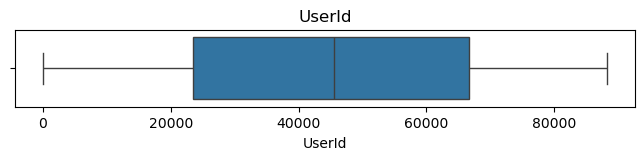

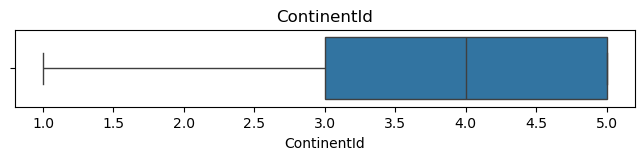

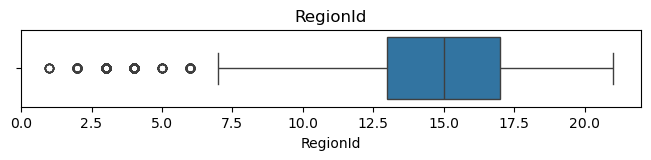

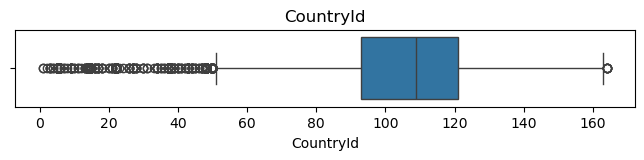

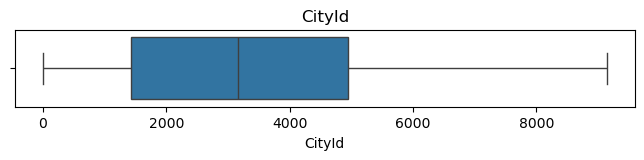

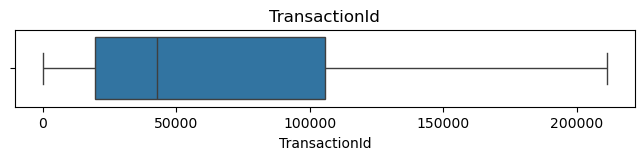

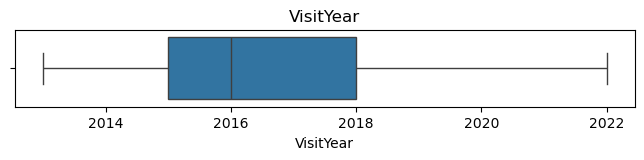

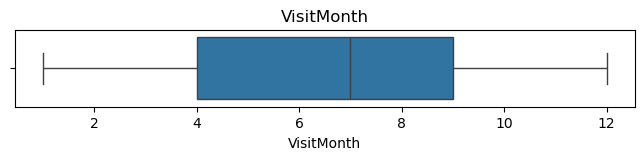

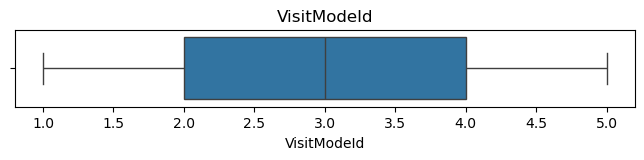

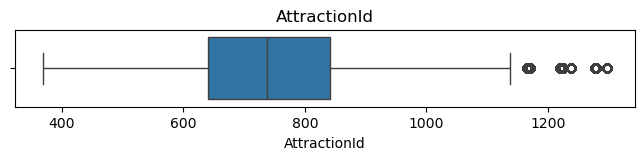

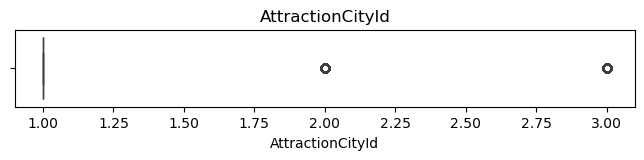

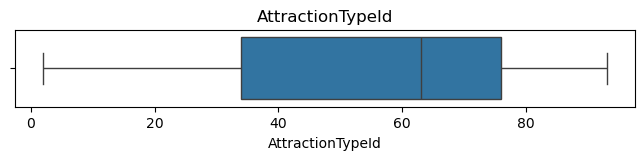

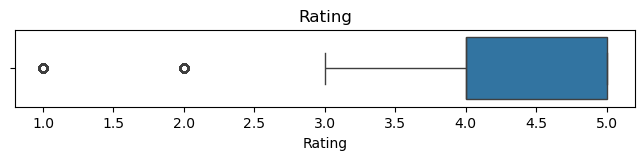

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# For one column
#sns.boxplot(x=df['Rating'])
#plt.show()

# For all numerical features
for col in df_l.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [ ]:
import pandas as pd

correlations = df_l.corr()['Rating'].sort_values(ascending=False)
correlations = correlations.abs()
print(correlations)


Rating              1.000000
AttractionTypeId    0.180465
AttractionId        0.044018
VisitMonth          0.019034
CityId              0.012828
CountryId           0.017097
TransactionId       0.142984
Name: Rating, dtype: float64


| Feature            | Correlation | Insight                                                                                                                    |
| ------------------ | ----------- | -------------------------------------------------------------------------------------------------------------------------- |
| `Rating`           | **1.000**   | Self-correlation (ignore).                                                                                                 |
| `AttractionTypeId` | **0.180**   | Weak positive correlation – certain attraction types may receive higher ratings.                                           |
| `AttractionId`     | **0.044**   | Very weak positive – individual attractions barely influence ratings linearly.                                             |
| `VisitMonth`       | **0.019**   | Very weak – seasonality or timing doesn't significantly affect ratings.                                                    |
| `VisitModeId`      | **0.005**   | Nearly no influence – how someone travels doesn’t relate much to their rating.                                             |
| `VisitYear`        | **-0.006**  | No real impact – rating hasn’t changed significantly over years.                                                           |
| `ContinentId`      | **-0.012**  | No substantial relationship – ratings don’t vary much by continent.                                                        |
| `UserId`           | **-0.012**  | Not useful – too many users; ID has no linear link to ratings.                                                             |
| `CityId`           | **-0.013**  | Minimal effect – city-level factors are not linearly affecting ratings.                                                    |
| `RegionId`         | **-0.015**  | Slightly negative – regional factor isn’t influential.                                                                     |
| `CountryId`        | **-0.017**  | Almost no effect – similar to region/city.                                                                                 |
| `AttractionCityId` | **-0.059**  | Weak negative – possibly some cities tend to have lower-rated attractions.                                                 |
| `TransactionId`    | **-0.143**  | Weak/moderate **negative** – this might signal something meaningful (e.g., older or certain transactions are lower-rated). |


In [ ]:
from sklearn.feature_selection import f_classif, f_regression

X = df_l.drop('Rating', axis=1)
y = df_l['Rating']

# For regression problems (predicting continuous Rating)
f_values, p_values = f_regression(X, y)

# Create a summary
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_values, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Score', ascending=False))

            Feature      F-Score        P-Value
5  AttractionTypeId  1780.422871   0.000000e+00
2     TransactionId  1103.828958  1.439555e-239
4      AttractionId   102.673656   4.157293e-24
3        VisitMonth    19.167535   1.199619e-05
0         CountryId    15.464074   8.419556e-05
1            CityId     8.704058   3.176415e-03


✅ Top Features Influencing Rating:|
 Feature                                | Insight                                                                                                                                                    |
| -------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **AttractionTypeId**                   | 🔥 Most influential feature. Different attraction types strongly impact how users rate them.                                                               |
| **TransactionId**                      | 📌 Be cautious. It's technically an identifier, but here it's acting like a proxy for complex user behavior or visit patterns. May cause **data leakage**. |
| **AttractionCityId**, **AttractionId** | 🏙️ Attraction and its location significantly affect ratings.                                                                                              |

⚠️ Moderate-to-Low Influence Features:
| Feature                     | F-Score | P-Value | Interpretation                                      |
| --------------------------- | ------- | ------- | --------------------------------------------------- |
| VisitMonth                  | 19.16   | 1e-5    | 🌤️ Seasonal trends impact ratings.                 |
| CountryId, RegionId, CityId | \~8–15  | <0.01   | 📌 Geographic features have some influence.         |
| UserId                      | 8.21    | 0.004   | 👤 Suggests user-specific patterns in ratings.      |
| ContinentId                 | 7.13    | 0.007   | 🗺️ Minor influence. Redundant with country/region. |

❌ Not Significant Features (P > 0.05):
| Feature     | F-Score | P-Value | Recommendation                               |
| ----------- | ------- | ------- | -------------------------------------------- |
| VisitYear   | 2.16    | 0.14    | Likely not affecting `Rating` significantly. |
| VisitModeId | 1.31    | 0.25    | Very weak relationship. Consider dropping.   |


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression  # or f_classif for classification
X = df_l.drop('Rating', axis=1)
y = df_l['Rating']
selector = SelectKBest(score_func=f_regression, k=12)
X_new = selector.fit_transform(X, y)
# Boolean mask of selected features
mask = selector.get_support()
# Selected feature names
selected_features = X.columns[mask]
# Step 4: Create DataFrame with all feature scores
feature_scores = selector.scores_
all_features = X.columns

scores_df = pd.DataFrame({
    'Feature': all_features,
    'Score': feature_scores
})

# Step 5: Sort by score descending
scores_df = scores_df.sort_values(by='Score', ascending=False)

# Step 6: Display top k features with scores
top_k_sorted = scores_df.head(12)
print("Top K Features (sorted by importance):")
print(top_k_sorted)



Top K Features (sorted by importance):
            Feature        Score
5  AttractionTypeId  1780.422871
2     TransactionId  1103.828958
4      AttractionId   102.673656
3        VisitMonth    19.167535
0         CountryId    15.464074
1            CityId     8.704058


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:783: UserWarning: k=12 is greater than n_features=6. All the features will be returned.
  warnings.warn(


In [ ]:
df_l.head()

,CountryId,CityId,TransactionId,VisitMonth,AttractionId,AttractionTypeId,Rating
0,22,154,-0.019144,0.697881,748,72,5
1,22,167,-0.892394,0.108419,640,63,4
2,14,52,-0.038706,0.108419,748,72,5
3,22,106,-0.918804,-0.775773,640,63,4
4,22,106,-0.677735,-0.775773,841,92,5
